In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/final-features
/kaggle/input/model-f
/kaggle/input/ahe-data
/kaggle/input/ahe-data/test
/kaggle/input/ahe-data/test/apse
/kaggle/input/ahe-data/test/column
/kaggle/input/ahe-data/test/flying_buttress
/kaggle/input/ahe-data/test/gargoyle
/kaggle/input/ahe-data/test/altar
/kaggle/input/ahe-data/test/bell_tower
/kaggle/input/ahe-data/test/vault
/kaggle/input/ahe-data/test/stained_glass
/kaggle/input/ahe-data/test/dome(inner)
/kaggle/input/ahe-data/test/dome(outer)
/kaggle/input/ahe-data/train
/kaggle/input/ahe-data/train/apse
/kaggle/input/ahe-data/train/column
/kaggle/input/ahe-data/train/flying_buttress
/kaggle/input/ahe-data/train/gargoyle
/kaggle/input/ahe-data/train/altar
/kaggle/input/ahe-data/train/bell_tower
/kaggle/input/ahe-data/train/vault
/kaggle/input/ahe-data/train/stained_glass
/kaggle/input/ahe-data/train/dome(inner)
/kaggle/input/ahe-data/train/dome(outer)


**TPU Setup**

In [2]:
import math, re, os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from kaggle_datasets import KaggleDatasets
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Tensorflow version 2.14.0
Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2023-11-23 06:37:02.161402: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.161515: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.161581: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.161667: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.161734: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.161969: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:37:02.162075: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


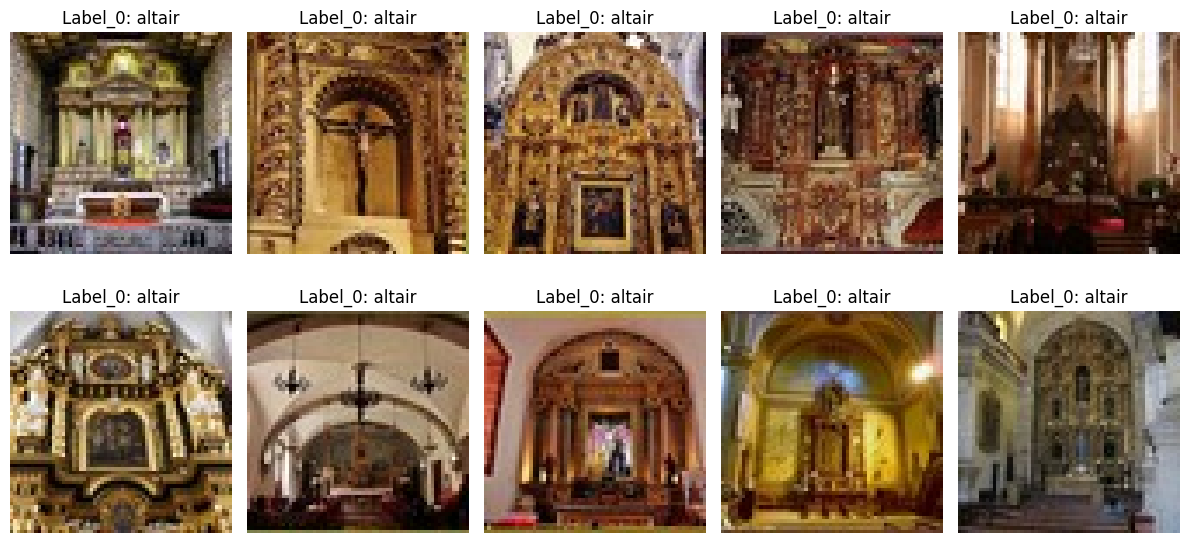

In [3]:
import random
import matplotlib.pyplot as plt
from PIL import Image
image_paths = os.listdir('/kaggle/input/ahe-data/train/altar/')
label = ['altair']*900
random_indices = random.sample(range(len(image_paths)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = random_indices[i]
    image_path = image_paths[index]
    label_0 = label[index]
    path='/kaggle/input/ahe-data/train/altar/'+image_path
    img = Image.open(path)
    print(img.size)
    ax.imshow(img)
    ax.axis('off') 
    ax.set_title(f'Label_0: {label_0}')
plt.tight_layout()
plt.savefig('Classifier_data(AHE Elements).png')
plt.show()

In [4]:
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def prepare_dataset(path,label):
    x_train=[]
    y_train=[]
    all_images_path=os.listdir(path)
    for img_path in all_images_path :
            img=load_img(path+img_path, target_size=(320,320))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
            y_train.append(label)
    if 'train' in path:
        return np.array(x_train[:len(x_train)]),np.array(y_train[:len(x_train)])
    else:
        return np.array(x_train[:len(x_train)]),np.array(y_train[:len(x_train)])

In [5]:
class_names = ['apse','column','flying_buttress','gargoyle','altar','bell_tower',
               'vault','stained_glass','dome(inner)','dome(outer)']
data_dict = {}
for i in range(len(class_names)):
    trainX, trainY = prepare_dataset("/kaggle/input/ahe-data/train/" + class_names[i] + "/",i)
    data_dict[class_names[i]] = (trainX, trainY)

# Iterate through the class names and print the shapes
for class_name in class_names:
    trainX, trainY = data_dict[class_name]
    print(f'train {class_name} shape: X={trainX.shape}, Y={trainY.shape}')

train apse shape: X=(505, 320, 320, 3), Y=(505,)
train column shape: X=(1914, 320, 320, 3), Y=(1914,)
train flying_buttress shape: X=(405, 320, 320, 3), Y=(405,)
train gargoyle shape: X=(1562, 320, 320, 3), Y=(1562,)
train altar shape: X=(828, 320, 320, 3), Y=(828,)
train bell_tower shape: X=(1057, 320, 320, 3), Y=(1057,)
train vault shape: X=(1097, 320, 320, 3), Y=(1097,)
train stained_glass shape: X=(998, 320, 320, 3), Y=(998,)
train dome(inner) shape: X=(589, 320, 320, 3), Y=(589,)
train dome(outer) shape: X=(1175, 320, 320, 3), Y=(1175,)


In [6]:
data_dict_test = {}
for i in range(len(class_names)):
    trainX, trainY = prepare_dataset("/kaggle/input/ahe-data/test/" + class_names[i] + "/",i)
    data_dict_test[class_names[i]] = (trainX, trainY)

# Iterate through the class names and print the shapes
for class_name in class_names:
    trainX, trainY = data_dict_test[class_name]
    print(f'val {class_name} shape: X={trainX.shape}, Y={trainY.shape}')

val apse shape: X=(50, 320, 320, 3), Y=(50,)
val column shape: X=(210, 320, 320, 3), Y=(210,)
val flying_buttress shape: X=(70, 320, 320, 3), Y=(70,)
val gargoyle shape: X=(240, 320, 320, 3), Y=(240,)
val altar shape: X=(140, 320, 320, 3), Y=(140,)
val bell_tower shape: X=(170, 320, 320, 3), Y=(170,)
val vault shape: X=(163, 320, 320, 3), Y=(163,)
val stained_glass shape: X=(150, 320, 320, 3), Y=(150,)
val dome(inner) shape: X=(69, 320, 320, 3), Y=(69,)
val dome(outer) shape: X=(142, 320, 320, 3), Y=(142,)


In [7]:
def df(data_dict):
    data_list=[]
    label_list=[]
    for class_name in class_names:
        trainX, trainY = data_dict[class_name]
        data_list.append(trainX)
        label_list.append(trainY)
    x_train = np.concatenate(data_list, axis=0)
    y_train = np.concatenate(label_list, axis=0)
    print('x_shape:', x_train.shape)
    print('y_shape:', y_train.shape)
    return x_train,y_train

In [8]:
X_train,y_train=df(data_dict)
X_test,y_test=df(data_dict_test)

x_shape: (10130, 320, 320, 3)
y_shape: (10130,)
x_shape: (1404, 320, 320, 3)
y_shape: (1404,)


In [9]:
from keras import backend as K
# prevent Tensorflow memory leakage
K.clear_session()

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from math import log2

In [11]:
import numpy as np
from math import log2
import matplotlib.pyplot as plt

def kl_loss(f1, f2, epsilon=1e-10):
    try:
        p, _ = np.histogram(f1, bins=256, range=(0, 256), density=True)
        q, _ = np.histogram(f2, bins=256, range=(0, 256), density=True)
        p = p[:256]
        q = q[:256]

        pq = sum(p[i] * log2((p[i] + epsilon) / (q[i] + epsilon)) for i in range(len(p)))
        qp = sum(q[i] * log2((q[i] + epsilon) / (p[i] + epsilon)) for i in range(len(q)))
        return (pq+qp)
    except Exception as e:
        print("Error:", e)

def plot_histograms(f1, f2):
    print("Finding Probability Distribution of Features.")
    p, _ = np.histogram(f1, bins=256, range=(0, 256), density=True)
    q, _ = np.histogram(f2, bins=256, range=(0, 256), density=True)
    p = p[:256]
    q = q[:256]
    x_range = np.arange(256)
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes[0, 0].plot(x_range, p, color='blue')
    axes[0, 0].set_title('Density of hist1')
    axes[0, 0].set_xlabel('Pixel Value')
    axes[0, 0].set_ylabel('Density')

    axes[0, 1].hist(np.arange(256), bins=256, weights=p, color='blue')
    axes[0, 1].set_title('Histogram of hist1')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')

    axes[1, 0].plot(x_range, q, color='red')
    axes[1, 0].set_title('Density of hist2')

    axes[1, 0].set_xlabel('Pixel Value')
    axes[1, 0].set_ylabel('Density')

    axes[1, 1].hist(np.arange(256), bins=256, weights=q, color='red')
    axes[1, 1].set_title('Histogram of hist2')
    axes[1, 1].set_xlabel('Pixel Value')
    axes[1, 1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print("Done.")


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

def Content_loss(fm1,fm2,l1=1,l2=0.2):
    """fm1: list of features generated by our Custom model on y_true
       fm2: list of features  generated by our custom model on autoencoder y_pred
    """
    sim=[]
    for i in range(len(fm1)):
            flat_features_image1 = fm1[i].flatten()
            flat_features_image2 = fm2[i].flatten()
            cosine_similarity_score = cosine_similarity([flat_features_image1], [flat_features_image2])
            sim.append(cosine_similarity_score)
    return l1*sim[4]+l2*sim[3]


In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
with strategy.scope():
    base_model = load_model('/kaggle/input/model-f/final_model.h5')
# base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-11-23 06:38:37.897426: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:37.897558: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


In [14]:
base_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 320, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 320, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 160, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 160, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 160, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 80, 128)       0   

In [15]:
with strategy.scope():
    def autoencoder(input_shape):
        encoder_input = layers.Input(shape=input_shape, name='encoder_input')
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
        x = layers.MaxPooling2D((2, 2), padding='same')(x)
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
        # Decoder
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.UpSampling2D((2, 2))(x)
        decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

        autoencoder_model = models.Model(encoder_input, decoded, name='autoencoder')

        return autoencoder_model

In [16]:
from tensorflow.keras.models import Model
with strategy.scope():
    feature_extractor_model = Model(inputs=base_model.input, outputs=[base_model.get_layer('block1_conv2').output,
                                                                    base_model.get_layer('block2_conv2').output,
                                                                    base_model.get_layer('block3_conv3').output,
                                                                    base_model.get_layer('block4_conv3').output,
                                                                    base_model.get_layer('block5_conv2').output])

In [17]:
X_train[0].shape

(320, 320, 3)

In [18]:
fm1=feature_extractor_model.predict(np.expand_dims(X_train[0], axis=0))

2023-11-23 06:38:45.390220: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.408169: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.425490: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.443509: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.460470: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.478130: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:45.495394: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

1/1 [==============================] - 12s 12s/step


2023-11-23 06:38:56.510866: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514028: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514155: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514249: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514341: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514487: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:38:56.514582: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [19]:
len(fm1),fm1[0].shape

(5, (1, 320, 320, 64))

In [20]:
for i in range(len(fm1)):
               print(fm1[i].shape)

(1, 320, 320, 64)
(1, 160, 160, 128)
(1, 80, 80, 256)
(1, 40, 40, 512)
(1, 20, 20, 512)


In [21]:
kl_loss(X_train[0],fm1[4])

0.6999342224369224

In [22]:
import tensorflow as tf

In [23]:
def Custom_Loss(y_true, y_pred):
    print(y_true.shape)
    print(y_pred.shape)
    fm1 = feature_extractor_model(np.expand_dims(y_true,axis=0))
    fm2 = feature_extractor_model(np.expand_dims(y_pred,axis=0))
    kl = kl_loss(fm2[4], fm1[4])
    cl = Content_loss(fm1, fm2)
    return (kl + cl)[0][0]

In [24]:
# Custom_Loss(X_train[0],X_train[0])

In [25]:
with strategy.scope():
    input_shape = (320, 320, 3)  
    model = autoencoder(input_shape)
    model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 320, 320, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 160, 160, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 160, 160, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 80, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 64)        

**Generate noisy images**

In [27]:
with strategy.scope():
    noise_factor = 0.4
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    x_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [28]:
print("X_train shape:", X_train.shape)
print("X_train_noisy shape:", X_train_noisy.shape)

X_train shape: (10130, 320, 320, 3)
X_train_noisy shape: (10130, 320, 320, 3)


**Train Auto Encoder**

In [29]:
results = {}

In [30]:
batch_sizes = [8, 16, 32, 64, 128]
epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# for batch_size in batch_sizes:
# #     K.clear_session()
history = model.fit(X_train, X_train_noisy,epochs=epochs,shuffle=True,callbacks=[early_stopping],
                    batch_size=128,validation_data=(X_test, X_test_noisy))


Epoch 1/100


2023-11-23 06:41:57.370612: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2023-11-23 06:41:58.000044: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:41:58.002328: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:41:58.002644: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:41:58.002759: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:41:58.003814: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:41:58.003925: E ./tensorflow/compiler/xla/stream_executor/st

 1/80 [..............................] - ETA: 20:21 - loss: 0.1296

2023-11-23 06:42:10.973113: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


51/80 [==================>...........] - ETA: 5s - loss: 0.1000

2023-11-23 06:42:20.944064: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80/80 [==============================] - ETA: 0s - loss: 0.0963

2023-11-23 06:42:46.044953: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80/80 [==============================] - 59s 550ms/step - loss: 0.0963 - val_loss: 0.1685
Epoch 2/100
47/80 [================>.............] - ETA: 6s - loss: 0.0892

2023-11-23 06:43:03.216980: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80/80 [==============================] - 17s 213ms/step - loss: 0.0891 - val_loss: 0.1672
Epoch 3/100
10/80 [==>...........................] - ETA: 13s - loss: 0.0890

2023-11-23 06:43:13.271901: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-23 06:43:13.272194: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80/80 [==============================] - 17s 218ms/step - loss: 0.0887 - val_loss: 0.1667
Epoch 4/100
80/80 [==============================] - 18s 223ms/step - loss: 0.0885 - val_loss: 0.1670
Epoch 5/100
80/80 [==============================] - 17s 219ms/step - loss: 0.0884 - val_loss: 0.1665
Epoch 6/100
49/80 [=================>............] - ETA: 5s - loss: 0.0883

2023-11-23 06:44:13.555064: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.


80/80 [==============================] - 18s 221ms/step - loss: 0.0883 - val_loss: 0.1663
Epoch 7/100
80/80 [==============================] - 17s 216ms/step - loss: 0.0883 - val_loss: 0.1663
Epoch 8/100
80/80 [==============================] - 18s 221ms/step - loss: 0.0882 - val_loss: 0.1664
Epoch 9/100
80/80 [==============================] - 18s 223ms/step - loss: 0.0882 - val_loss: 0.1662
Epoch 10/100
80/80 [==============================] - 18s 220ms/step - loss: 0.0881 - val_loss: 0.1660
Epoch 11/100
80/80 [==============================] - 18s 222ms/step - loss: 0.0880 - val_loss: 0.1660
Epoch 12/100
80/80 [==============================] - 18s 226ms/step - loss: 0.0880 - val_loss: 0.1660
Epoch 13/100
80/80 [==============================] - 18s 228ms/step - loss: 0.0880 - val_loss: 0.1659
Epoch 14/100
80/80 [==============================] - 18s 220ms/step - loss: 0.0879 - val_loss: 0.1658
Epoch 15/100
80/80 [==============================] - 18s 223ms/step - loss: 0.0880 - val

In [40]:
results[32] = {'train_loss': history.history['loss'],'val_loss': history.history['val_loss']}

In [32]:
X_test_noisy[0].shape

(320, 320, 3)

In [33]:
# with strategy.scope():
#     decoded_images = model.predict(X_test_noisy)
#     results[128]['decoded_images'] = decoded_images

In [36]:
results[128]['train_loss']

[0.09634179621934891,
 0.08910948783159256,
 0.08872771263122559,
 0.08846304565668106,
 0.08838780969381332,
 0.08832736313343048,
 0.08827950805425644,
 0.08821994811296463,
 0.08815852552652359,
 0.08812312036752701,
 0.08803819119930267,
 0.08801699429750443,
 0.08804410696029663,
 0.08794388175010681,
 0.08795463293790817,
 0.08790670335292816,
 0.0879158079624176,
 0.08788716793060303,
 0.0878802165389061,
 0.08784129470586777,
 0.0878303274512291,
 0.08782904595136642,
 0.08780423551797867,
 0.08779115229845047,
 0.08778320997953415,
 0.08781073242425919,
 0.08774092048406601,
 0.08773113787174225,
 0.08771950006484985,
 0.08772693574428558,
 0.08771137148141861,
 0.087716244161129,
 0.08768386393785477,
 0.08770863711833954,
 0.0876925140619278,
 0.08768585324287415,
 0.0876842513680458,
 0.08769872039556503,
 0.08768404275178909,
 0.08766205608844757,
 0.08765050023794174,
 0.08765453100204468,
 0.0876626968383789,
 0.08766304701566696,
 0.08765595406293869,
 0.087658293545246

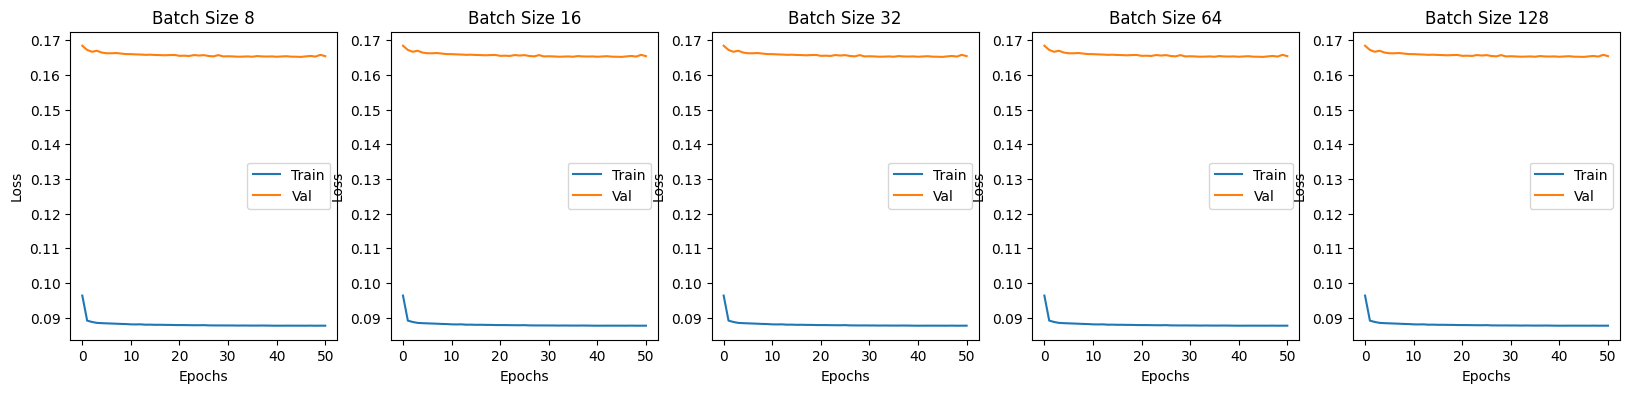

In [42]:
fig, axs = plt.subplots(1, len(batch_sizes), figsize=(20, 4))
for i, batch_size in enumerate(batch_sizes):
    axs[i].plot(results[batch_size]['train_loss'], label=f'Train')
    axs[i].plot(results[batch_size]['val_loss'], label=f'Val')
    axs[i].set_title(f'Batch Size {batch_size}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].legend()
    plt.savefig('AE_Training_Analysis.png')

**Test Auto Encoder**

In [43]:
K.clear_session()

In [44]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [45]:
# single_sample = X_test_noisy[0]
# single_sample = np.expand_dims(single_sample, axis=0)
# decoded_images = model.predict(single_sample)
# results[128]['decoded_images'] = decoded_images

In [91]:
print("Original shape:", X_test_noisy.shape)

# Try using np.expand_dims alone
expanded_dims = np.expand_dims(X_test_noisy, axis=0)
print("Shape after np.expand_dims:", expanded_dims.shape)

Original shape: (1404, 320, 320, 3)
Shape after np.expand_dims: (1, 1404, 320, 320, 3)


In [90]:
decoded_images = model(X_test_noisy)

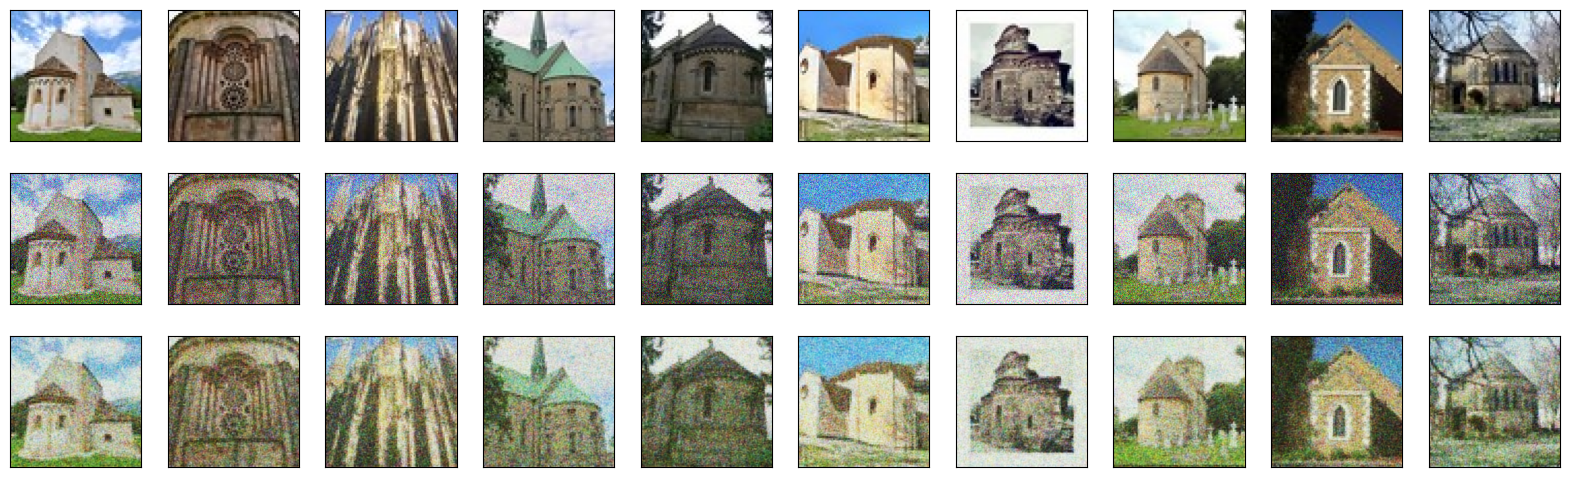

In [112]:
# with strategy.scope():
#     decoded_images = model.predict(X_test_noisy)
n = 10 
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('ALL_Images.png')

plt.show()

In [93]:
decoded_images[0].shape,X_test[i].shape,X_test_noisy[i].shape

(TensorShape([320, 320, 3]), (320, 320, 3), (320, 320, 3))

In [50]:
base_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 320, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 320, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 160, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 160, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 160, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 80, 128)       0   

In [51]:
# y_Pred_gen=base_model.predict(np.argmax(decoded_images[0:10]))
# y_test_gen=y_test[0:10]
# y_pred_orig=base_model.predict(np.argmax(X_test[0:10]))

In [52]:
# y_Pred_gen[0]

2023-11-23 07:01:22.445413: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1/1 [==============================] - 10s 10s/step


1/1 [==============================] - 0s 405ms/step


1/1 [==============================] - 0s 401ms/step


1/1 [==============================] - 0s 393ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 0s 389ms/step


1/1 [==============================] - 0s 379ms/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 0s 379ms/step


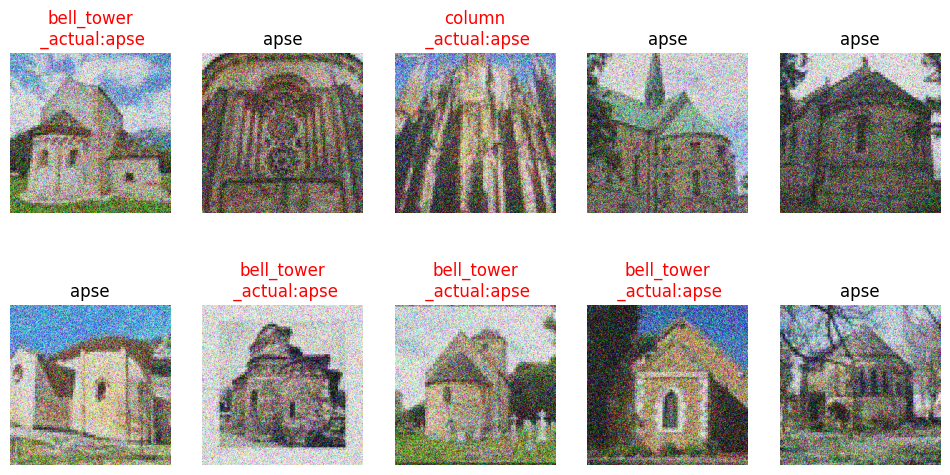

In [53]:
def plot_and_save_random_images(y_test,x_test,model, save_path='random_images.png'):
    title_colors = []
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        label = class_names[y_test[i]]
        predicted_class = class_names[np.argmax(model.predict(np.expand_dims(X_test[i],axis=0)))]                             
        if predicted_class != label:
            title_color = 'red'
            predicted_class=str(predicted_class)+'\n _actual:'+str(label)
        else:
            title_color = 'black'
        title_colors.append(title_color)
        ax.imshow(x_test[i])
        ax.set_title(predicted_class, color=title_color)
        ax.axis('off')
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
plot_and_save_random_images(y_test, X_test_noisy,base_model, save_path='Result_Noisy.png')

1/1 [==============================] - 0s 380ms/step


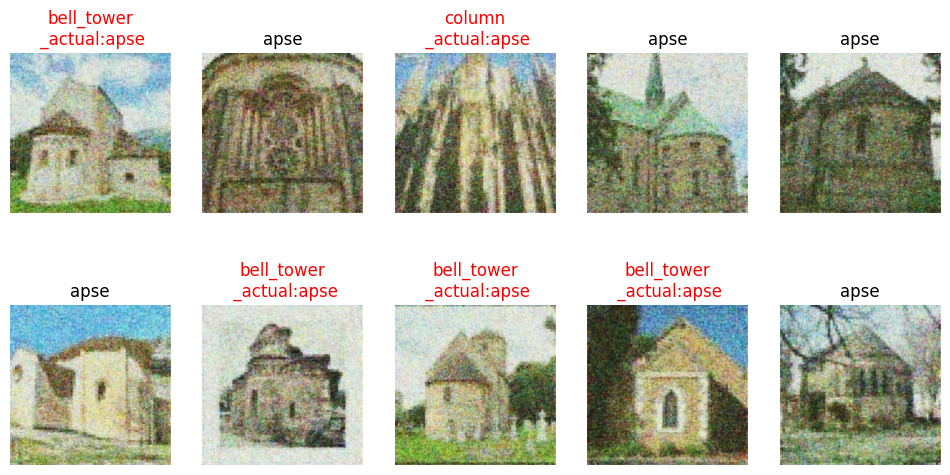

In [94]:
plot_and_save_random_images(y_test, decoded_images,base_model, save_path='AE_Our_Result_Noisy_.png')

1/1 [==============================] - 0s 401ms/step


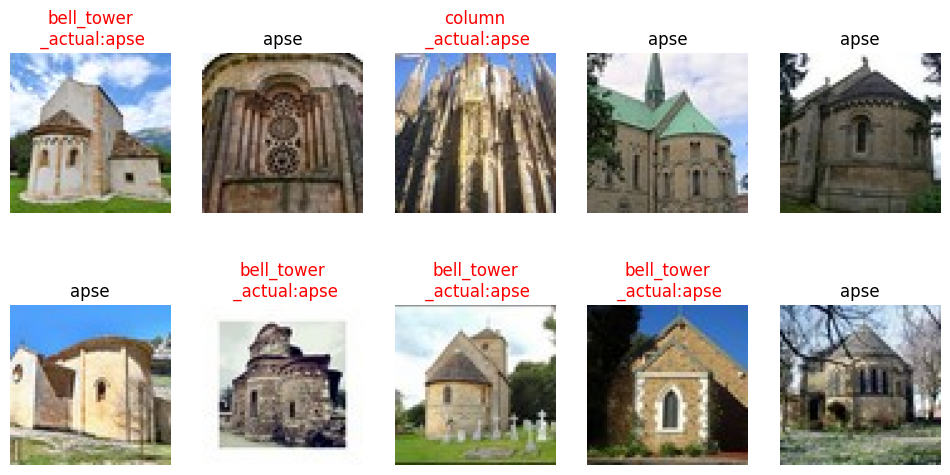

In [55]:
plot_and_save_random_images(y_test, X_test,base_model, save_path='Original_Result.png')

In [56]:
# Save the entire model to a file
model.save('AE.h5')

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
!pip install pydot
!pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [104]:
import visualkeras

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


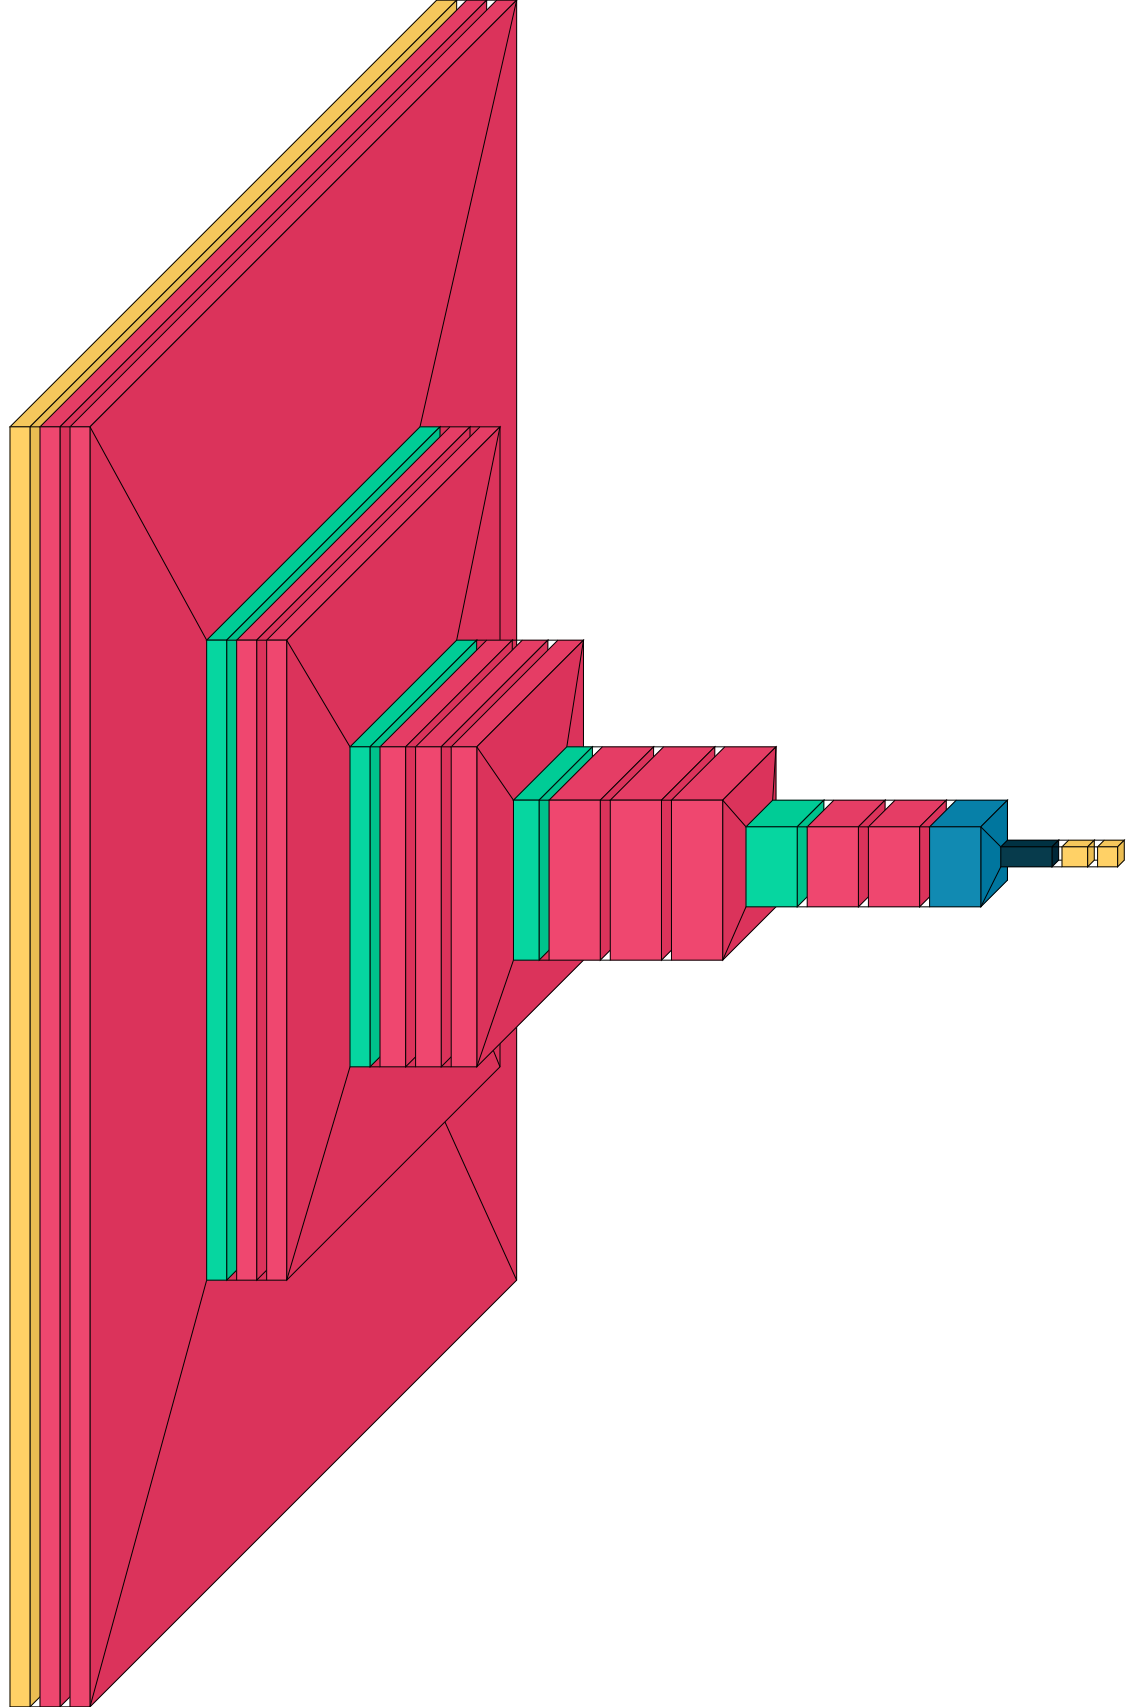

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/412.


In [110]:
from tensorflow.keras.utils import plot_model
plot_model(base_model, to_file='Classifier_model_Arch.png', show_shapes=True, show_layer_names=True)
visualkeras.layered_view(base_model, to_file='Classifier_model_Arch.png').show() 
visualkeras.layered_view(base_model)

In [102]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


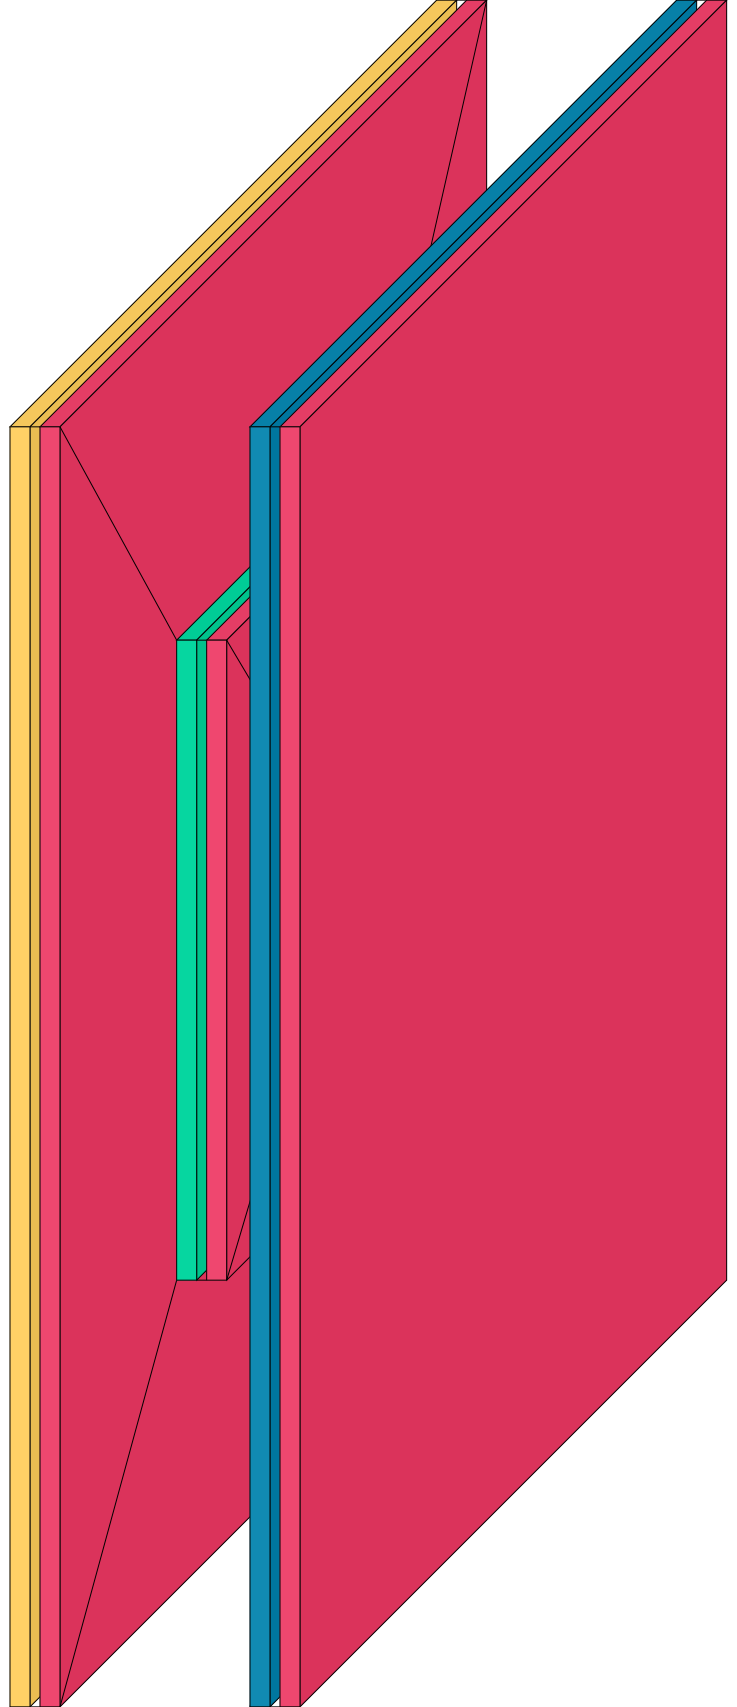

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/412.


In [111]:
plot_model(model, to_file='AE_model_Arch.png', show_shapes=True, show_layer_names=True)
visualkeras.layered_view(model, to_file='AE_model_Arch.png').show() # write and show
visualkeras.layered_view(model)

In [71]:
y_pred=base_model.predict(X_test)
y_pred_Noisy=base_model.predict(X_test_noisy)

44/44 [==============================] - 2s 29ms/step


In [72]:
y_pred

array([[1.0160222e-01, 5.3087752e-03, 9.7455614e-04, ..., 7.3530785e-08,
        1.0584272e-05, 4.5805965e-03],
       [8.7822801e-01, 4.3034919e-02, 6.6172988e-03, ..., 8.3660858e-04,
        2.1512276e-05, 2.7048332e-04],
       [1.6761456e-02, 4.2681238e-01, 1.7323282e-01, ..., 7.9453450e-05,
        5.0816734e-06, 2.1868354e-05],
       ...,
       [5.2523316e-04, 8.5859153e-10, 5.5339106e-06, ..., 5.4289966e-08,
        8.6727461e-09, 9.9946254e-01],
       [2.0281302e-08, 2.9598032e-12, 3.2987661e-11, ..., 1.2963370e-09,
        4.6702649e-11, 9.9999988e-01],
       [5.1091967e-05, 1.9600011e-05, 2.9467697e-06, ..., 5.3642816e-07,
        8.1194614e-08, 9.9940646e-01]], dtype=float32)

In [73]:
y_pred=np.argmax(y_pred,axis=1)
y_pred_noisy=np.argmax(y_pred_Noisy,axis=1)

In [74]:
y_test,y_pred

(array([0, 0, 0, ..., 9, 9, 9]), array([5, 0, 1, ..., 9, 9, 9]))

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


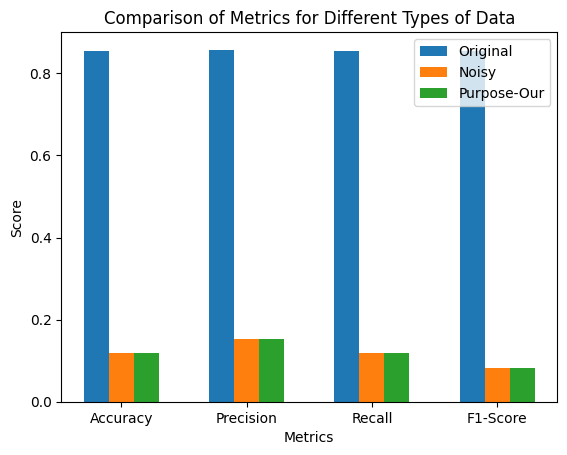

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calculate metrics
accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred, average='weighted')
recall_original = recall_score(y_test, y_pred, average='weighted')
f1_original = f1_score(y_test, y_pred, average='weighted')

accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
precision_noisy = precision_score(y_test, y_pred_noisy, average='weighted')
recall_noisy = recall_score(y_test, y_pred_noisy, average='weighted')
f1_noisy = f1_score(y_test, y_pred_noisy, average='weighted')

accuracy_purpose = accuracy_score(y_test, y_pred_noisy)
precision_purpose = precision_score(y_test, y_pred_noisy, average='weighted')
recall_purpose = recall_score(y_test, y_pred_noisy, average='weighted')
f1_purpose = f1_score(y_test, y_pred_noisy, average='weighted')

# Data for plotting
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
original_data = [accuracy_original, precision_original, recall_original, f1_original]
noisy_data = [accuracy_noisy, precision_noisy, recall_noisy, f1_noisy]
purpose_data = [accuracy_purpose, precision_purpose, recall_purpose, f1_purpose]

# Plotting
bar_width = 0.2
index = np.arange(len(categories))

plt.bar(index, original_data, bar_width, label='Original')
plt.bar(index + bar_width, noisy_data, bar_width, label='Noisy')
plt.bar(index + 2*bar_width, purpose_data, bar_width, label='Purpose-Our')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Types of Data')
plt.xticks(index + bar_width, categories)
plt.legend()
plt.savefig('metrics_comparison.png')
plt.show()